In [1]:
A = [ 2  0; 1  -1 ]

2×2 Array{Int64,2}:
 2   0
 1  -1

In Julia one uses `norm` for vector norms and `opnorm` for induced matrix norms. The default matrix norm is the 2-norm.

In [2]:
using LinearAlgebra
twonorm = opnorm(A)

2.2882456112707374

(A potential snag is that `norm` does work on a matrix but treats it like a vector of stacked columns, giving a different result.)

You can get the 1-norm as well.

In [3]:
onenorm = opnorm(A,1)

3.0

The 1-norm is equivalent to 

In [4]:
maximum( sum(abs.(A),dims=1) )   # sum down the rows (1st matrix dimension)

3

Similarly, we can get the $\infty$-norm and check our formula for it.

In [5]:
infnorm = opnorm(A,Inf)

2.0

In [6]:
maximum( sum(abs.(A),dims=2) )   # sum across columns (2nd matrix dimension)

2

Here we illustrate the geometric interpretation of the 2-norm. First, we will sample a lot of vectors on the unit circle in $\mathbb{R}^2$. 

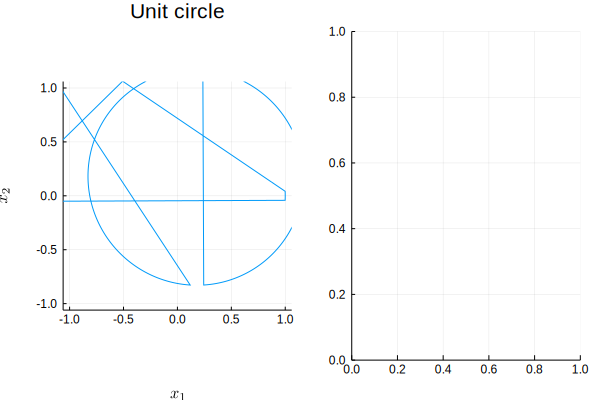

In [7]:
theta = 2*pi*(0:1/600:1)
x = @. [ cos(theta) sin(theta) ]'   # 601 unit columns

using Plots
plot(x[1,:],x[2,:],aspect_ratio=1,layout=(1,2),subplot=1,
    title="Unit circle",leg=:none,xlabel="\$x_1\$",ylabel="\$x_2\$")

We can apply `A` to every column of `x` simply by using a matrix multiplication.

In [8]:
Ax = A*x;

We superimpose the image of the unit circle with the circle whose radius is $\|A\|_2$, and display the plots side by side.

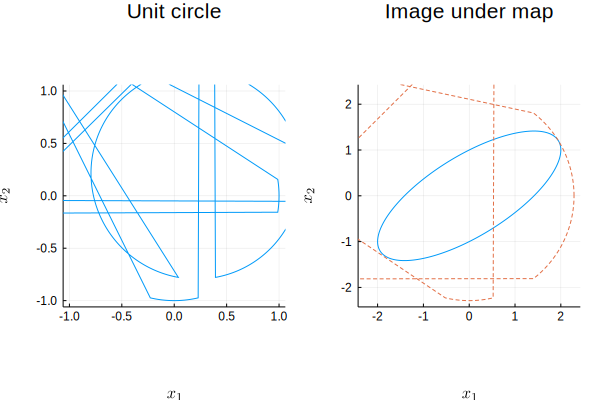

In [9]:
plot!(Ax[1,:],Ax[2,:],subplot=2,aspect_ratio=1,
    title="Image under map",leg=:none,xlabel="\$x_1\$",ylabel="\$x_2\$")
plot!(twonorm*x[1,:],twonorm*x[2,:],subplot=2,l=:dash)
